In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
rain_dataset=pd.read_csv("/content/weatherAUS.csv")

In [ ]:
rain_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
rain_dataset.shape

(8425, 23)

In [ ]:
rain_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [ ]:
rain_dataset.isnull().sum()

,0
Date,0
Location,0
MinTemp,75
MaxTemp,60
Rainfall,240
Evaporation,3512
Sunshine,3994
WindGustDir,991
WindGustSpeed,991
WindDir9am,829


In [ ]:
rain_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [ ]:
rain_dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
rain_dataset=rain_dataset.fillna(value=0)

In [ ]:
rain_dataset.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [ ]:
rain_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [ ]:
rain_dataset['WindDir9am']=rain_dataset['WindDir9am'].astype(str)
rain_dataset['WindGustDir'] = rain_dataset['WindGustDir'].astype(str)
rain_dataset['WindDir3pm'] = rain_dataset['WindDir3pm'].astype(str)
rain_dataset['RainToday'] = rain_dataset['RainToday'].astype(str)
rain_dataset['RainTomorrow'] = rain_dataset['RainTomorrow'].astype(str)


In [ ]:
encoder=LabelEncoder()
rain_dataset['Location']=encoder.fit_transform(rain_dataset['Location'])

In [ ]:
rain_dataset['WindGustDir']=encoder.fit_transform(rain_dataset['WindGustDir'])
rain_dataset['WindDir9am']=encoder.fit_transform(rain_dataset['WindDir9am'])
rain_dataset['WindDir3pm']=encoder.fit_transform(rain_dataset['WindDir3pm'])
rain_dataset['RainToday']=encoder.fit_transform(rain_dataset['RainToday'])
rain_dataset['RainTomorrow']=encoder.fit_transform(rain_dataset['RainTomorrow'])


In [ ]:
rain_dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,1,13.4,22.9,0.6,0.0,0.0,14,44.0,14,...,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,1,1
1,2008-12-02,1,7.4,25.1,0.0,0.0,0.0,15,44.0,7,...,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,1,1
2,2008-12-03,1,12.9,25.7,0.0,0.0,0.0,16,46.0,14,...,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,1,1
3,2008-12-04,1,9.2,28.0,0.0,0.0,0.0,5,24.0,10,...,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,1,1
4,2008-12-05,1,17.5,32.3,1.0,0.0,0.0,14,41.0,2,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,1,1


In [ ]:
rain_dataset_temp=rain_dataset.loc[:,['MinTemp','MaxTemp','Evaporation','Sunshine','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','RainTomorrow']]

In [ ]:
rain_dataset_temp.shape

(8425, 13)

In [ ]:
rain_dataset_temp.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.0,0.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1
1,7.4,25.1,0.0,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1
2,12.9,25.7,0.0,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1
3,9.2,28.0,0.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1
4,17.5,32.3,0.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

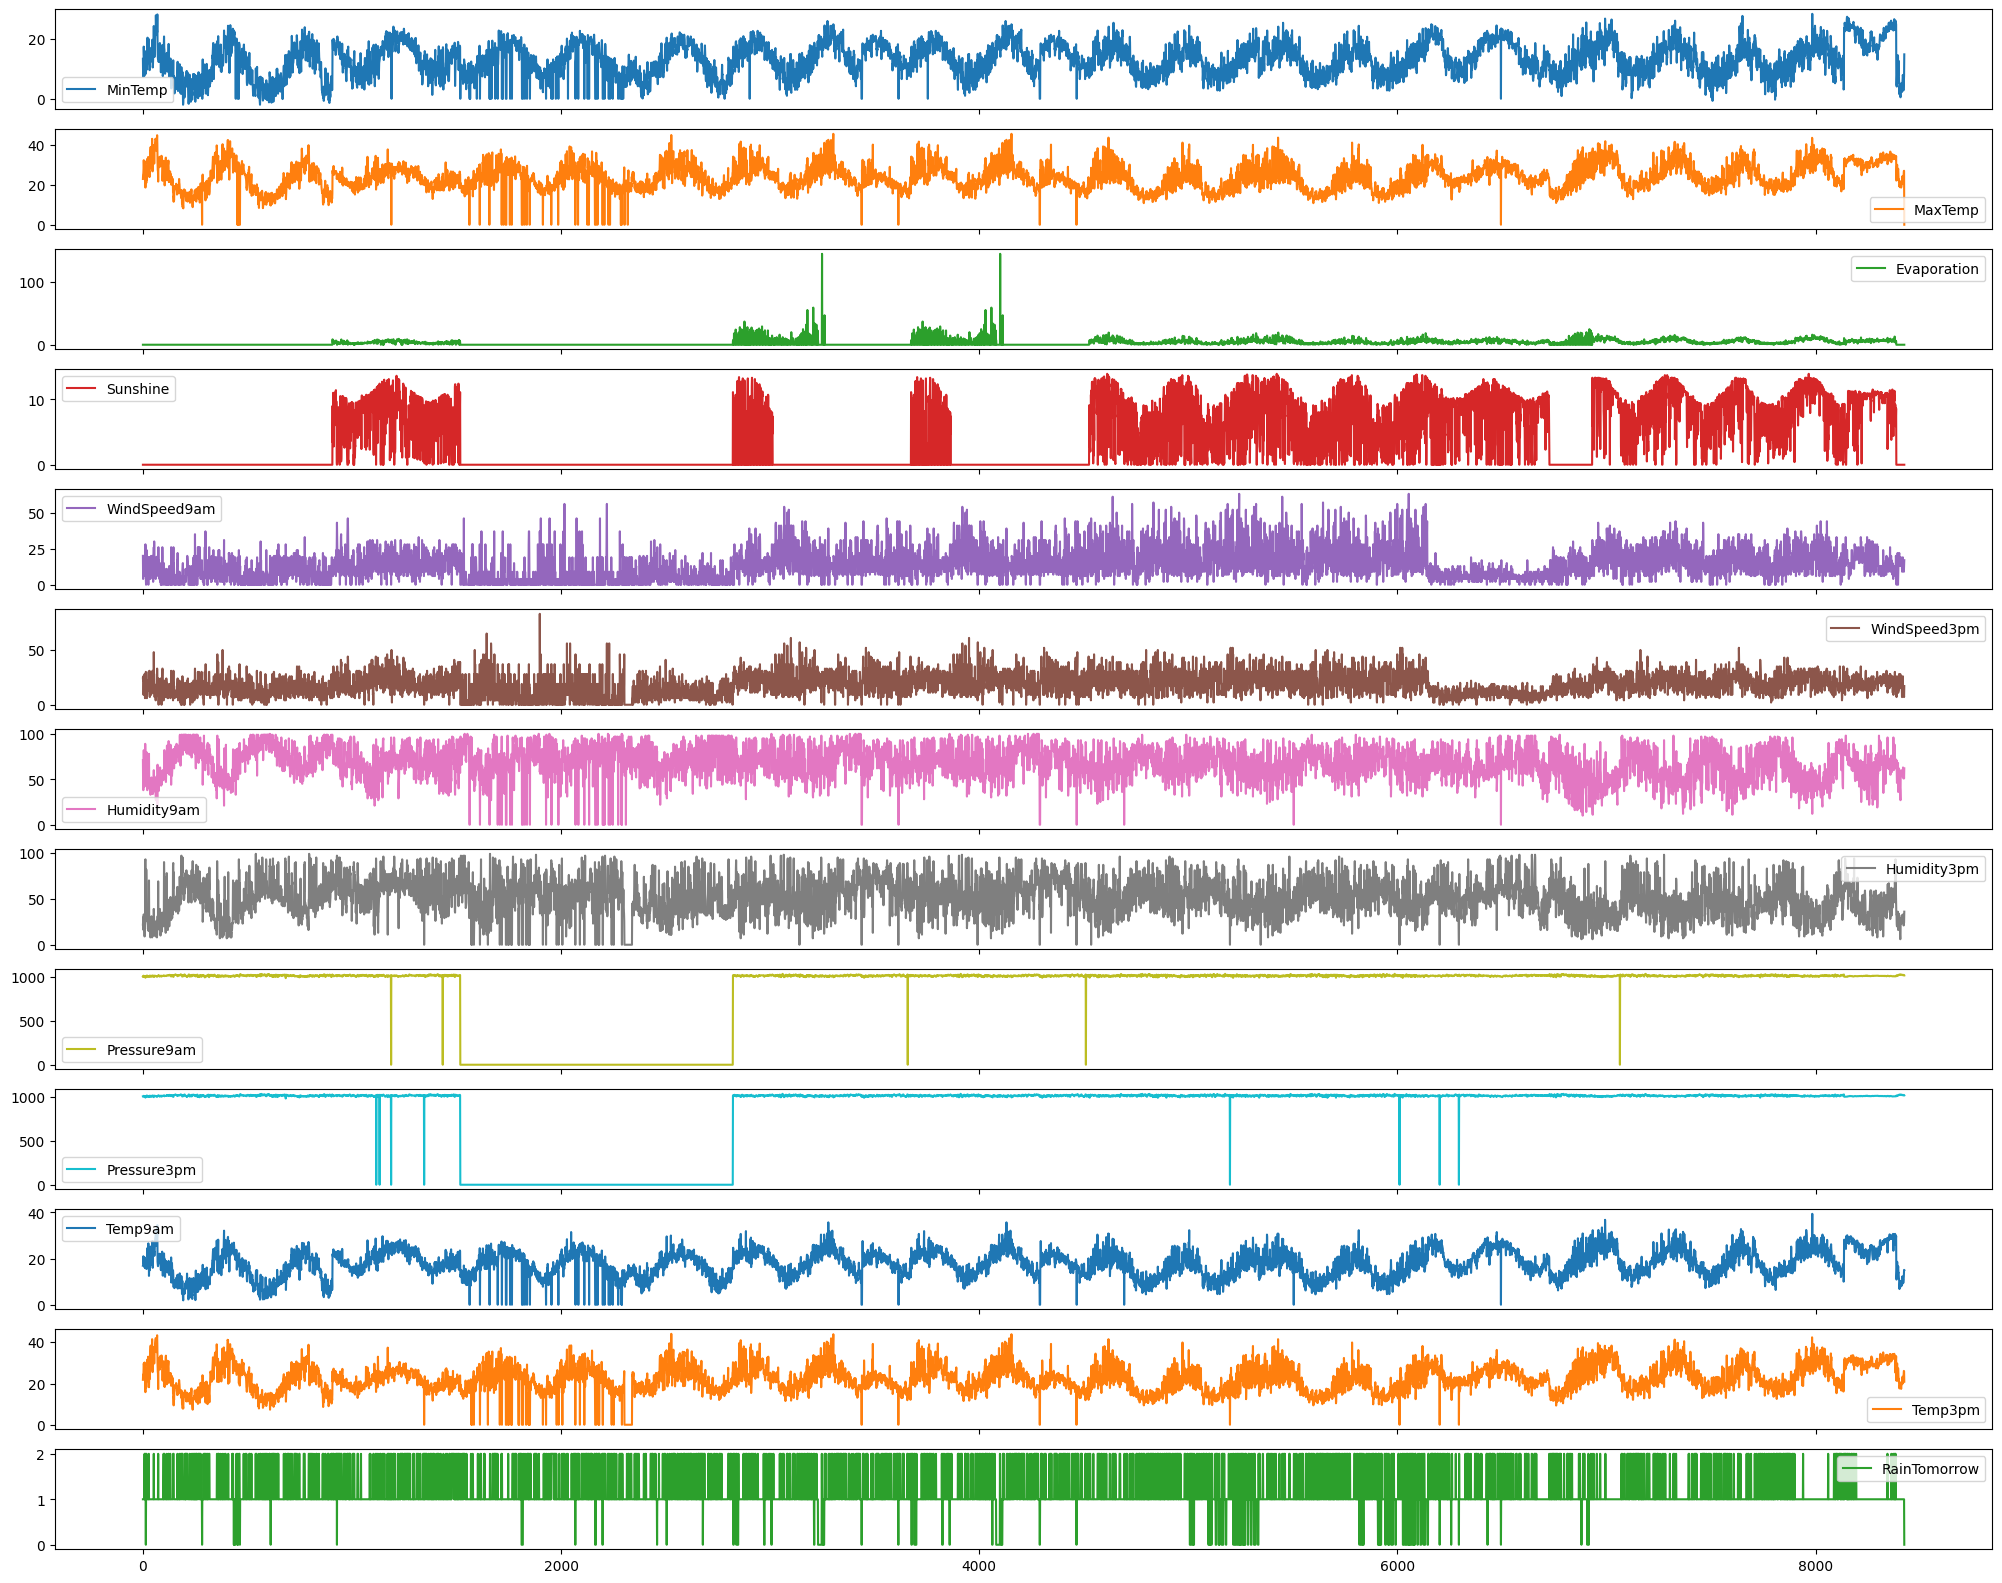

In [ ]:
rain_dataset_temp.plot(subplots=True, figsize=(25,20))

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Evaporation'}>,
        <Axes: title={'center': 'Sunshine'}>],
       [<Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>],
       [<Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RainTomorrow'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

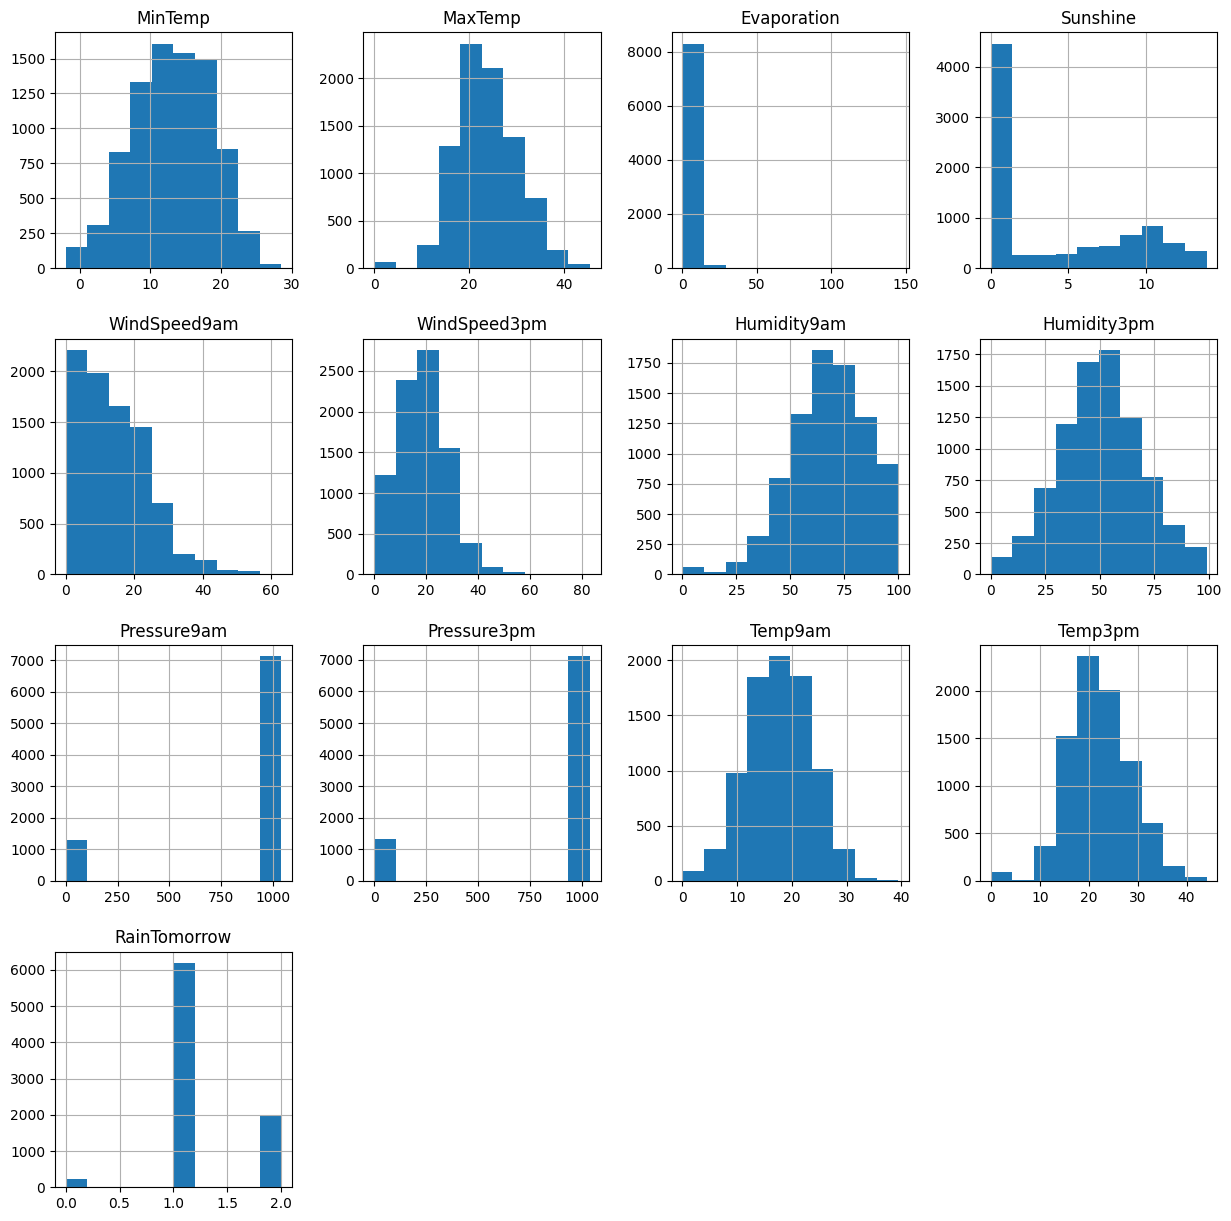

In [ ]:

rain_dataset_temp.hist(bins=10,figsize=(15,15))

<Axes: >

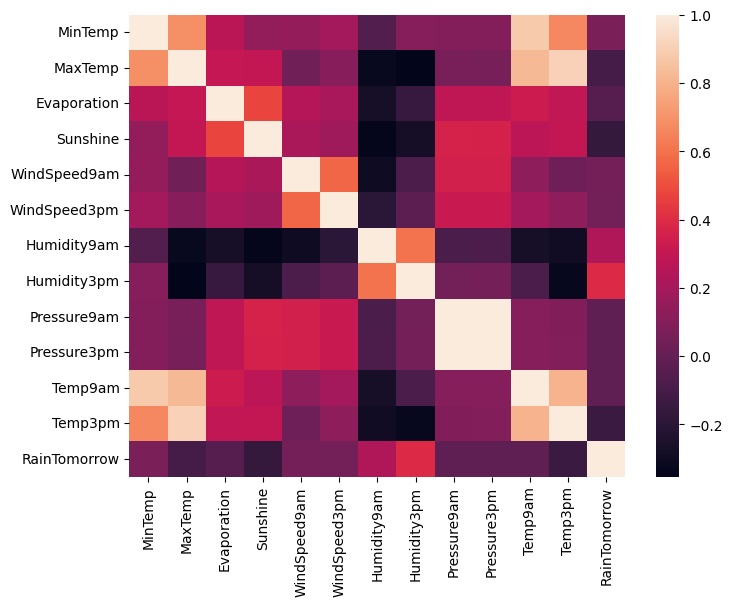

In [ ]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(rain_dataset_temp.corr(), ax=axes)

In [ ]:
rain_dataset_temp.index = pd.to_datetime(rain_dataset_temp.index)


In [ ]:
weth=rain_dataset_temp['2009':'2010']

In [ ]:
rain_dataset_temp.index = pd.to_datetime(rain_dataset_temp.index)
weth = rain_dataset_temp[:'1980']

In [ ]:
weth.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
1970-01-01 00:00:00.000000000,13.4,22.9,0.0,0.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1
1970-01-01 00:00:00.000000001,7.4,25.1,0.0,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1
1970-01-01 00:00:00.000000002,12.9,25.7,0.0,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1
1970-01-01 00:00:00.000000003,9.2,28.0,0.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1
1970-01-01 00:00:00.000000004,17.5,32.3,0.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1


In [ ]:
rain_dataset_temp.head()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
1970-01-01 00:00:00.000000000,13.4,22.9,0.0,0.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1
1970-01-01 00:00:00.000000001,7.4,25.1,0.0,0.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1
1970-01-01 00:00:00.000000002,12.9,25.7,0.0,0.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1
1970-01-01 00:00:00.000000003,9.2,28.0,0.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1
1970-01-01 00:00:00.000000004,17.5,32.3,0.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1


In [ ]:
rain_dataset_temp.tail()

,MinTemp,MaxTemp,Evaporation,Sunshine,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainTomorrow
1970-01-01 00:00:00.000008420,2.8,23.4,0.0,0.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,1
1970-01-01 00:00:00.000008421,3.6,25.3,0.0,0.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,1
1970-01-01 00:00:00.000008422,5.4,26.9,0.0,0.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,1
1970-01-01 00:00:00.000008423,7.8,27.0,0.0,0.0,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,1
1970-01-01 00:00:00.000008424,14.9,0.0,0.0,0.0,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,0


In [ ]:
rain_x=rain_dataset_temp.drop(columns ='RainTomorrow', axis=1)
rain_y=rain_dataset_temp['RainTomorrow']


In [ ]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(rain_x)
x_scaler

array([[ 0.0587207 , -0.12277573, -0.67162497, ...,  0.40731787,
        -0.12847334, -0.06045438],
       [-1.02822179,  0.21910826, -0.67162497, ...,  0.40921915,
        -0.07666627,  0.3298713 ],
       [-0.03185784,  0.31234935, -0.67162497, ...,  0.41166365,
         0.57955663,  0.158128  ],
       ...,
       [-1.39053595,  0.49883153, -0.67162497, ...,  0.43366415,
        -0.88831038,  0.61090579],
       [-0.95575896,  0.51437171, -0.67162497, ...,  0.43284932,
        -0.43931576,  0.59529276],
       [ 0.33045632, -3.68147731, -0.67162497, ...,  0.43665188,
        -0.45658479, -0.20097163]])

In [ ]:
vif=pd.DataFrame()
vif['Score']=[variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif['features']=rain_x.columns
vif

,Score,features
0,5.882519,MinTemp
1,7.385401,MaxTemp
2,1.422492,Evaporation
3,1.558934,Sunshine
4,1.753482,WindSpeed9am
5,1.537505,WindSpeed3pm
6,2.054955,Humidity9am
7,2.289203,Humidity3pm
8,102.337691,Pressure9am
9,102.701104,Pressure3pm


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(rain_x,rain_y,test_size=0.4,random_state=2)

In [ ]:
rain_x.shape

(8425, 12)

In [ ]:
rain_y.shape

(8425,)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
prediction = model.predict(x_test)

In [ ]:
print(prediction)

[1.41489946 1.36264741 1.23792135 ... 1.30693031 1.74460273 1.01603202]


calculating error

In [ ]:
score=r2_score( y_test,prediction)

In [ ]:
print(score)

0.16209268227508977


calculating varience score

In [ ]:
print('Variance score: %.2f' % model.score(x_test,y_test))

Variance score: 0.16


In [ ]:
for i in range(len(prediction)):
  prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':y_test,'Prediction':prediction,'diff':(y_test-prediction)})


,Actual,Prediction,diff
1970-01-01 00:00:00.000001006,2,1.41,0.59
1970-01-01 00:00:00.000002931,1,1.36,-0.36
1970-01-01 00:00:00.000005673,1,1.24,-0.24
1970-01-01 00:00:00.000007833,1,1.11,-0.11
1970-01-01 00:00:00.000002013,2,1.37,0.63
...,...,...,...
1970-01-01 00:00:00.000003580,1,1.29,-0.29
1970-01-01 00:00:00.000001004,2,1.22,0.78
1970-01-01 00:00:00.000000914,1,1.31,-0.31
1970-01-01 00:00:00.000004672,2,1.74,0.26


In [ ]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(prediction-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((prediction - y_test) ** 2))
print("R2-score: %.2f" % r2_score(prediction,y_test ) )


Mean absolute error: 0.32
Residual sum of squares (MSE): 0.18
R2-score: -3.21


In [ ]:
input_data=(14.9,	0.0,	0.0,	0.0,	17.0,	17.0,	62.0,	36.0,	1020.2,	1017.9,	15.0,	20.9)

In [ ]:
input_data_as_array=np.asarray(input_data)
input_data_reshaped=input_data_as_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[0.6310622]


In [ ]:
if(prediction[0]==1):
  print("It will rain tomorrow")
else:
  print("It will not rain tomorrow")


It will not rain tomorrow


Decision Tree regressior

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0,
                      random_state=0, splitter='best')

DecisionTreeRegressor(criterion='mse', random_state=0)

In [ ]:
prediction2=regressor.predict(x_test)
np.mean(np.absolute(prediction2-y_test))

0.21539317507418398

In [ ]:
print('Variance score: %.2f' % regressor.score(x_test,y_test))

Variance score: -0.07


In [ ]:
for i in range(len(prediction2)):
  prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':y_test,'Prediction':prediction2,'diff':(y_test-prediction2)})

,Actual,Prediction,diff
1970-01-01 00:00:00.000001006,2,2.0,0.0
1970-01-01 00:00:00.000002931,1,2.0,-1.0
1970-01-01 00:00:00.000005673,1,1.0,0.0
1970-01-01 00:00:00.000007833,1,1.0,0.0
1970-01-01 00:00:00.000002013,2,1.0,1.0
...,...,...,...
1970-01-01 00:00:00.000003580,1,1.0,0.0
1970-01-01 00:00:00.000001004,2,1.0,1.0
1970-01-01 00:00:00.000000914,1,1.0,0.0
1970-01-01 00:00:00.000004672,2,2.0,0.0
